In [27]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

mnist = input_data.read_data_sets("/Users/sasankauppu/Desktop/Data Mining CS6220/DataMining/Mnist/", one_hot=False)

Extracting /Users/sasankauppu/Desktop/Data Mining CS6220/DataMining/Mnist/train-images-idx3-ubyte.gz
Extracting /Users/sasankauppu/Desktop/Data Mining CS6220/DataMining/Mnist/train-labels-idx1-ubyte.gz
Extracting /Users/sasankauppu/Desktop/Data Mining CS6220/DataMining/Mnist/t10k-images-idx3-ubyte.gz
Extracting /Users/sasankauppu/Desktop/Data Mining CS6220/DataMining/Mnist/t10k-labels-idx1-ubyte.gz


In [13]:
# Define the neural network
def neural_net(x_dict):
    x = x_dict['images']
    layer_1 = tf.layers.dense(x, 256)
    layer_2 = tf.layers.dense(layer_1, 256)
    out_layer = tf.layers.dense(layer_2, 10)
    return out_layer

In [14]:
# Define the model function (following TF Estimator Template)
def model_fn(features, labels, mode):
    
    # Build the neural network
    logits = neural_net(features)
    
    # Predictions
    pred_classes = tf.argmax(logits, axis=1)
    pred_probas = tf.nn.softmax(logits)
    
    # If prediction mode, early return
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes) 
        
    # Define loss and optimizer
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits, labels=tf.cast(labels, dtype=tf.int32)))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
    train_op = optimizer.minimize(loss_op, global_step=tf.train.get_global_step())
    
    # Evaluate the accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)
    
    # EstimatorSpec same for training, evaluating
    estim_specs = tf.estimator.EstimatorSpec(
      mode=mode,
      predictions=pred_classes,
      loss=loss_op,
      train_op=train_op,
      eval_metric_ops={'accuracy': acc_op})

    return estim_specs

In [15]:
# Build the Estimator
model = tf.estimator.Estimator(model_fn=model_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x108fc8c50>, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/var/folders/7h/cgdqqj3n2tb7z4rv0mhlsjdm0000gn/T/tmp5epXdi', '_save_summary_steps': 100}


In [16]:
# Train the Model
input_fn = tf.estimator.inputs.numpy_input_fn(x={'images': mnist.train.images}, y=mnist.train.labels,
    batch_size=128, num_epochs=None, shuffle=True)

model.train(input_fn, steps=5000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/7h/cgdqqj3n2tb7z4rv0mhlsjdm0000gn/T/tmp5epXdi/model.ckpt.
INFO:tensorflow:loss = 2.4647934, step = 1
INFO:tensorflow:global_step/sec: 199.529
INFO:tensorflow:loss = 0.36377913, step = 101 (0.503 sec)
INFO:tensorflow:global_step/sec: 186.373
INFO:tensorflow:loss = 0.32902092, step = 201 (0.537 sec)
INFO:tensorflow:global_step/sec: 205.672
INFO:tensorflow:loss = 0.4859342, step = 301 (0.486 sec)
INFO:tensorflow:global_step/sec: 201.127
INFO:tensorflow:loss = 0.25807604, step = 401 (0.497 sec)
INFO:tensorflow:global_step/sec: 205.736
INFO:tensorflow:loss = 0.3100416, step = 501 (0.486 sec)
INFO:tensorflow:global_step/sec: 196.393
INFO:tensorflow:loss = 0.42001462, step = 601 (0.509 sec)
INFO:tensorflow:global_step/sec: 201.53
INFO:tensorflow:loss = 0.20890293, step = 701 (0.496 sec)
INFO:tensorflow:global_step/sec: 188.593
INFO:tensorflow:loss = 0.2860902, step = 801 (0.530 sec)
INFO:ten

In [17]:
# Evaluate the Model
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.test.images}, y=mnist.test.labels,
    batch_size=128, shuffle=False)

model.evaluate(input_fn)

INFO:tensorflow:Starting evaluation at 2018-03-28-18:39:31
INFO:tensorflow:Restoring parameters from /var/folders/7h/cgdqqj3n2tb7z4rv0mhlsjdm0000gn/T/tmp5epXdi/model.ckpt-5000
INFO:tensorflow:Finished evaluation at 2018-03-28-18:39:31
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.9135, global_step = 5000, loss = 0.2930345


{'accuracy': 0.9135, 'global_step': 5000, 'loss': 0.2930345}

INFO:tensorflow:Restoring parameters from /var/folders/7h/cgdqqj3n2tb7z4rv0mhlsjdm0000gn/T/tmp5epXdi/model.ckpt-5000


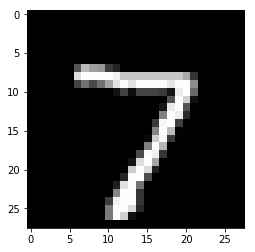

('Model prediction:', 7)


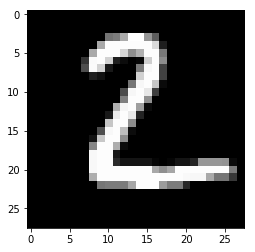

('Model prediction:', 2)


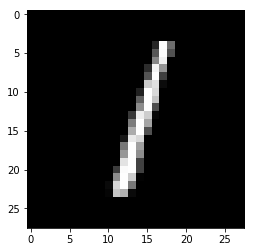

('Model prediction:', 1)


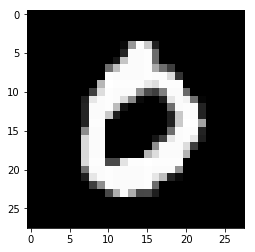

('Model prediction:', 0)


In [18]:
# Predict single images
n_images = 4
# Get images from test set
test_images = mnist.test.images[:n_images]
# Prepare the input data
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': test_images}, shuffle=False)
# Use the model to predict the images class
preds = list(model.predict(input_fn))

# Display
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction:", preds[i])

In [2]:
# Define the neural network
def neural_netNG(x_dict):
    x = x_dict['images']
    layer_1 = tf.layers.dense(x, 256)
    layer_2 = tf.layers.dense(layer_1, 256)
    out_layer = tf.layers.dense(layer_2, 20)
    return out_layer

In [8]:
# Define the model function (following TF Estimator Template)
def model_fnNG(features, labels, mode):
    
    # Build the neural network
    logits = neural_netNG(features)
    
    # Predictions
    pred_classes = tf.argmax(logits, axis=1)
    pred_probas = tf.nn.softmax(logits)
    
    # If prediction mode, early return
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes) 
        
    # Define loss and optimizer
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits, labels=tf.cast(labels, dtype=tf.int32)))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
    train_op = optimizer.minimize(loss_op, global_step=tf.train.get_global_step())
    
    # Evaluate the accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)
    
    # EstimatorSpec same for training, evaluating
    estim_specs = tf.estimator.EstimatorSpec(
      mode=mode,
      predictions=pred_classes,
      loss=loss_op,
      train_op=train_op,
      eval_metric_ops={'accuracy': acc_op})

    return estim_specs

In [21]:
def get_ng_fs(chisq=True):
    
    ng = fetch_20newsgroups(subset='all')
    ng_X = ng.data
    ng_y = ng.target
    
    del(ng)
    
    count_vect = CountVectorizer(stop_words="english",min_df=3,max_df=0.5)
    ng_X = count_vect.fit_transform(ng_X)
    tfidf_transformer = TfidfTransformer(use_idf=True)
    ng_X = tfidf_transformer.fit_transform(ng_X)
    
    
    ng_X_train,ng_X_test,ng_y_train,ng_y_test = train_test_split(ng_X,ng_y,test_size=0.25,random_state=42)
    

    if(chisq):
        mod = SelectKBest(chi2, k=20000)
    else:
        mod = SelectKBest(mutual_info_classif, k=20000)
    
    
    ng_X_train = mod.fit_transform(ng_X_train, ng_y_train)
    
    
    mgs = mod.get_support()
    at=[]
    for j in range(len(mgs)):
        if(mgs[j]):
            at.append(j)
    
    ng_X_test=ng_X_test.todense()
    ng_X_test=ng_X_test[:,at]

    return (ng_X_train,ng_y_train,ng_X_test,ng_y_test)

In [22]:
(ng_X_train,ng_y_train,ng_X_test,ng_y_test)=get_ng_fs(True)

In [23]:
modelNG = tf.estimator.Estimator(model_fn=model_fnNG)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x106fcff90>, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/var/folders/7h/cgdqqj3n2tb7z4rv0mhlsjdm0000gn/T/tmpvxd6FE', '_save_summary_steps': 100}


In [25]:
# Train the Model
input_fn = tf.estimator.inputs.numpy_input_fn(x={'images': ng_X_train.todense()}, y=ng_y_train,
    batch_size=128, num_epochs=None, shuffle=True)

modelNG.train(input_fn, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /var/folders/7h/cgdqqj3n2tb7z4rv0mhlsjdm0000gn/T/tmpvxd6FE/model.ckpt-1
INFO:tensorflow:Saving checkpoints for 2 into /var/folders/7h/cgdqqj3n2tb7z4rv0mhlsjdm0000gn/T/tmpvxd6FE/model.ckpt.
INFO:tensorflow:loss = 2.996205422239822, step = 2
INFO:tensorflow:global_step/sec: 5.9738
INFO:tensorflow:loss = 2.9776020570211363, step = 102 (16.742 sec)
INFO:tensorflow:global_step/sec: 6.08842
INFO:tensorflow:loss = 2.9627063842218098, step = 202 (16.426 sec)
INFO:tensorflow:global_step/sec: 6.26026
INFO:tensorflow:loss = 2.9195806676788427, step = 302 (15.972 sec)
INFO:tensorflow:global_step/sec: 6.16334
INFO:tensorflow:loss = 2.9068810571721926, step = 402 (16.225 sec)
INFO:tensorflow:global_step/sec: 6.50309
INFO:tensorflow:loss = 2.846967050611325, step = 502 (15.384 sec)
INFO:tensorflow:global_step/sec: 5.77405
INFO:tensorflow:loss = 2.8152422814258315, step = 602 (17.313 sec)
INFO:tensorflow:global_step/

In [26]:
# Evaluate the Model
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': ng_X_test}, y=ng_y_test,
    batch_size=128, shuffle=False)

modelNG.evaluate(input_fn)

INFO:tensorflow:Starting evaluation at 2018-03-28-18:47:43
INFO:tensorflow:Restoring parameters from /var/folders/7h/cgdqqj3n2tb7z4rv0mhlsjdm0000gn/T/tmpvxd6FE/model.ckpt-1001
INFO:tensorflow:Finished evaluation at 2018-03-28-18:47:49
INFO:tensorflow:Saving dict for global step 1001: accuracy = 0.6485569, global_step = 1001, loss = 2.1813822


{'accuracy': 0.6485569, 'global_step': 1001, 'loss': 2.1813822}